# Exercício Computacional: Parte 1
Exercícios implementados em Python 3 utilizando Jupyter Notebook. As bibliotecas skfuzzy e simpful foram utilizadas para implementar os modelos Mamadani e Sugeno, respectivamente.

###### Importação de pacotes

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
import simpful as sf
import pandas as pd

## Questão 3. Mecanismos de inferência nebulosa

### 3.1 Aproximação de funções

Aproximar a função y=x² empregando os mecanismos de inferência do Mamdani e do Sugeno (linear e constante) utilizando Toolbox Fuzzy do Matlab. <b>Mostrar os gráficos e erro quadrático médio.</b>

###### Listas de domínio e imagem

In [251]:
x = np.arange(-2, 2, 0.01)
y = x ** 2

#### Modelo de Mamdani

##### Antecedentes

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


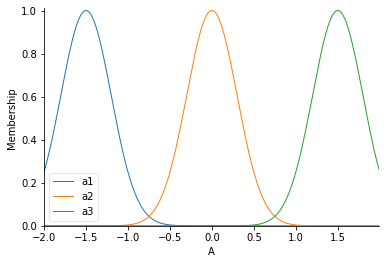

In [252]:
a = ctrl.Antecedent(x, "A")
a['a1'] = fuzz.gaussmf(x, -1.5, 0.3)
a['a2'] = fuzz.gaussmf(x, 0, 0.3)
a['a3'] = fuzz.gaussmf(x, 1.5, 0.3)

a.view()

##### Consequentes

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


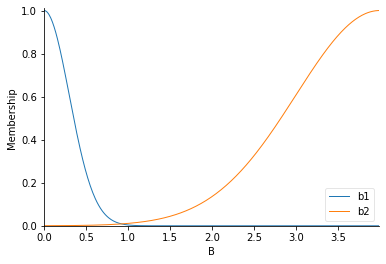

In [253]:
b = ctrl.Consequent(np.arange(y.min(), y.max(), 0.01), "B")
b['b1'] = fuzz.gaussmf(b.universe, 0, 0.3)
b['b2'] = fuzz.gaussmf(b.universe, 4, 1)

b.view()

##### Regras

In [254]:
and_func = np.fmin
or_func = np.fmax

r1 = ctrl.Rule(antecedent=a['a1'], consequent=b['b2'], label='R1', and_func=and_func, or_func=or_func)
r2 = ctrl.Rule(antecedent=a['a2'], consequent=b['b1'], label='R2', and_func=and_func, or_func=or_func)
r3 = ctrl.Rule(antecedent=a['a3'], consequent=b['b2'], label='R3', and_func=and_func, or_func=or_func)

control_system = ctrl.ControlSystem(rules = [r1, r2, r3])
simulation = ctrl.ControlSystemSimulation(control_system)

def simulate(simulation, xi):
    simulation.input['A'] = xi
    simulation.compute()
    print('z = ',simulation.output['B'])
    a.view(sim=simulation)
    b.view(sim=simulation)

##### Simulacão para x = 0

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


z =  0.23944860976272855


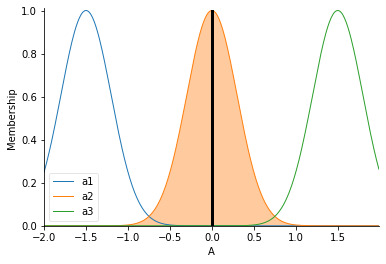

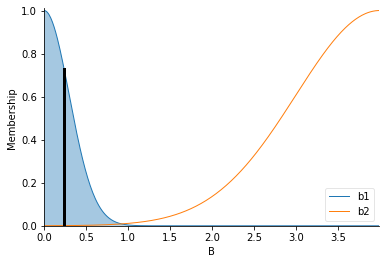

In [255]:
simulate(simulation, 0)

##### Simulacão para x = 0.25

z =  0.2638937172064114


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


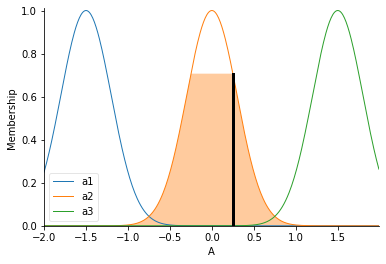

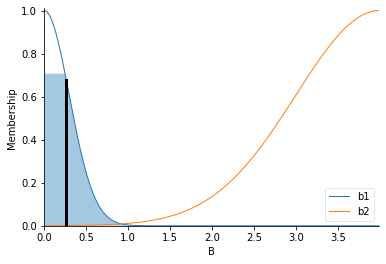

In [256]:
simulate(simulation, 0.25)

##### Simulacão para x = 0.5

z =  0.47776955036991675


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


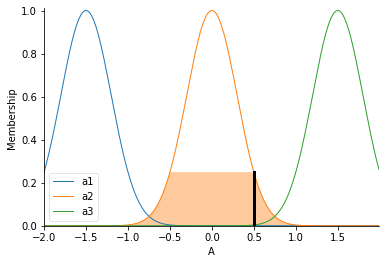

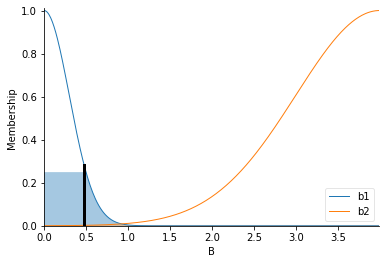

In [257]:
simulate(simulation, 0.5)

##### Simulacão para x = 0.75

z =  2.0885356888906332


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


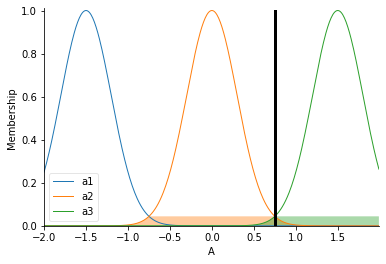

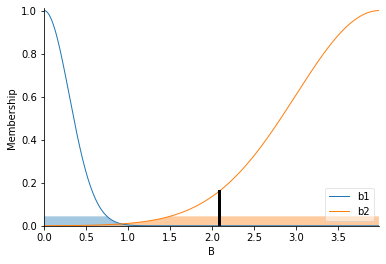

In [258]:
simulate(simulation, 0.75)

##### Simulacão para x = 1

z =  2.874880345868018


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


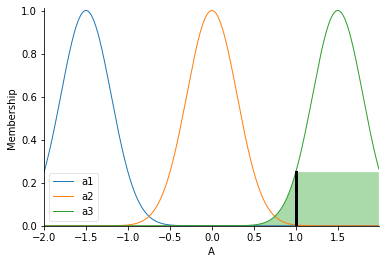

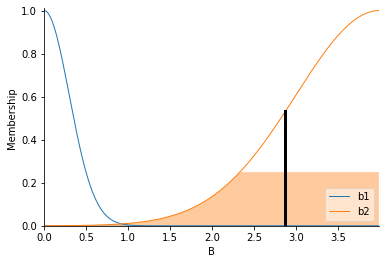

In [259]:
simulate(simulation, 1)

##### Simulacão para x = 1.25

z =  3.1260390380692313


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


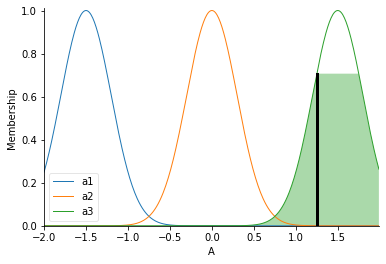

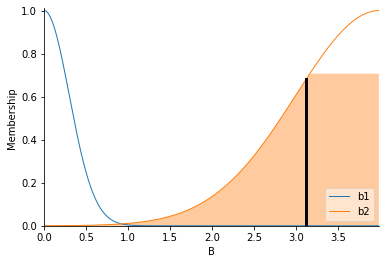

In [260]:
simulate(simulation, 1.25)

##### Simulacão para x = 1.5

z =  3.195950215061696


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


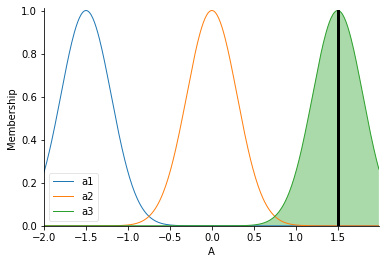

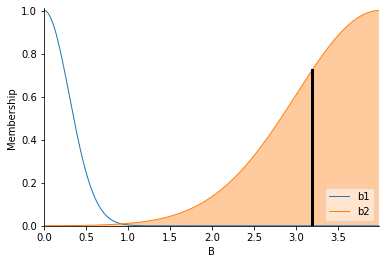

In [261]:
simulate(simulation, 1.5)

##### Simulacão para x = 1.75

z =  3.1260390380692313


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


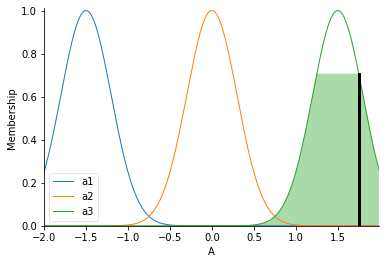

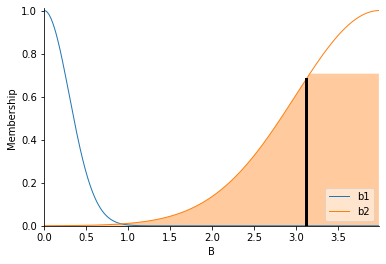

In [262]:
simulate(simulation, 1.75)

##### Simulacão para x = 2

z =  2.8946027211924874


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


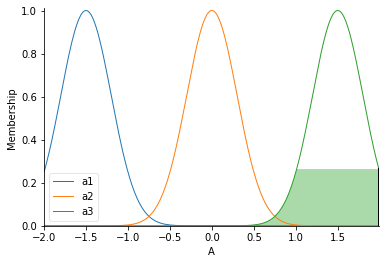

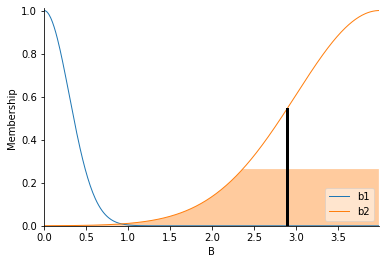

In [263]:
simulate(simulation, 2)


##### Gráfico de superfície

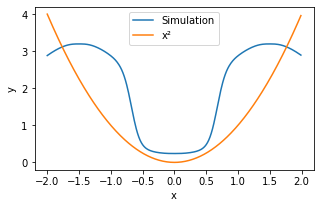

In [264]:
result_simulation = []

for i in x:
    simulation.input['A'] = i
    simulation.compute()
    result_simulation.append(simulation.output['B'])

def plot_surface_chart(result_simulation):
    plt.figure(figsize=(5, 3))
    plt.plot(x, result_simulation, label='Simulation')
    plt.plot(x, y, label='x²')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plot_surface_chart(result_simulation)

##### Mean squared error (MSE)

In [265]:
mse = mean_squared_error(y, result_simulation)
print('MSE: ', mse)

MSE:  1.1991964539953472


#### Modelo Sugeno de Ordem Zero
##### Antecedentes

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



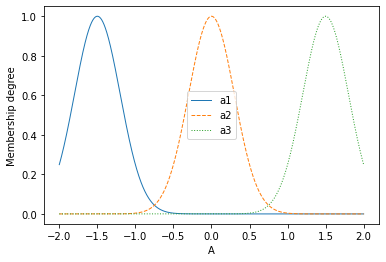

In [266]:
system_zero_order = sf.FuzzySystem()

a1 = sf.GaussianFuzzySet(-1.5, 0.3, 'a1')
a2 = sf.GaussianFuzzySet(0, 0.3, 'a2')
a3 = sf.GaussianFuzzySet(1.5, 0.3, 'a3')
a = sf.LinguisticVariable([a1, a2, a3], universe_of_discourse=[-2,2])
system_zero_order.add_linguistic_variable("A", a)
a.plot()


###### Consequentes

In [267]:
system_zero_order.set_crisp_output_value("b1", 0)
system_zero_order.set_crisp_output_value("b2", 4)


 * Detected Sugeno model type


###### Regras

In [268]:
system_zero_order.add_rules([
    "IF (A IS a1) THEN (B IS b2)",
    "IF (A IS a2) THEN (B IS b1)",
    "IF (A IS a3) THEN (B IS b2)"
])

def simulate_sugeno(system, xi):
    system.set_variable("A", xi)        
    print('z = ', system.Sugeno_inference()["B"])

###### Simulação para x = 0

In [269]:
simulate_sugeno(system_zero_order, 0)

z =  2.9813003171183694e-05


###### Simulação para x = 0.25

In [270]:
simulate_sugeno(system_zero_order, 0.25)

z =  0.0009614778501396344


###### Simulação para x = 0.5

In [271]:
simulate_sugeno(system_zero_order, 0.5)

z =  0.061068618996020334


###### Simulação para x = 0.75

In [272]:
simulate_sugeno(system_zero_order, 0.75)

z =  2.000000000013888


###### Simulação para x = 1

In [273]:
simulate_sugeno(system_zero_order, 1)

z =  3.938931384478502


###### Simulação para x = 1.25

In [274]:
simulate_sugeno(system_zero_order, 1.25)

z =  3.999038753148724


###### Simulação para x = 1.5

In [275]:
simulate_sugeno(system_zero_order, 1.5)

z =  3.9999850934428633


###### Simulação para x = 1.75

In [276]:
simulate_sugeno(system_zero_order, 1.75)

z =  3.999999768890073


###### Simulação para x = 2

In [277]:
simulate_sugeno(system_zero_order, 2)

z =  3.9999999964169053


###### Gráfico de superfície

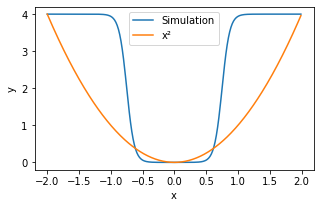

In [278]:
result_simulation = []

for i in x:
    system_zero_order.set_variable("A", i)
    result_simulation.append(system_zero_order.Sugeno_inference()["B"])

plot_surface_chart(result_simulation)

###### Mean squared error (MSE)

In [279]:
mse = mean_squared_error(y, result_simulation)
print('MSE: ', mse)

MSE:  2.651363908952247


#### Modelo Sugeno de Primeira Ordem
##### Antecedentes

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



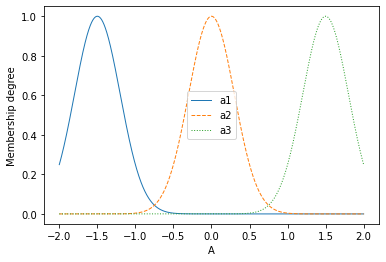

In [280]:
system_first_order = sf.FuzzySystem()
system_first_order.add_linguistic_variable("A", a)
a.plot()

###### Consequentes

In [281]:
system_first_order.set_output_function("b1", "abs(A/2.67)")
system_first_order.set_output_function("b2", "abs(A*1.5)")

 * Detected Sugeno model type


###### Regras

In [282]:
system_first_order.add_rules([
    "IF (A IS a1) THEN (B IS b2)",
    "IF (A IS a2) THEN (B IS b1)",
    "IF (A IS a3) THEN (B IS b2)"
])

###### Simulação para x = 0

In [283]:
simulate_sugeno(system_first_order, 0)

z =  0.0


###### Simulação para x = 0.25

In [284]:
simulate_sugeno(system_first_order, 0.25)

z =  0.09370059084596605


###### Simulação para x = 0.5

In [285]:
simulate_sugeno(system_first_order, 0.5)

z =  0.19585726592149072


###### Simulação para x = 0.75

In [286]:
simulate_sugeno(system_first_order, 0.75)

z =  0.702949438205178


###### Simulação para x = 1

In [287]:
simulate_sugeno(system_first_order, 1)

z =  1.4828173043406274


###### Simulação para x = 1.25

In [288]:
simulate_sugeno(system_first_order, 1.25)

z =  1.8746619210219937


###### Simulação para x = 1.5

In [289]:
simulate_sugeno(system_first_order, 1.5)

z =  2.249993708679186


###### Simulação para x = 1.75

In [290]:
simulate_sugeno(system_first_order, 1.75)

z =  2.624999886203246


###### Simulação para x = 2

In [291]:
simulate_sugeno(system_first_order, 2)

z =  2.9999999979836702


###### Gráfico de superfície

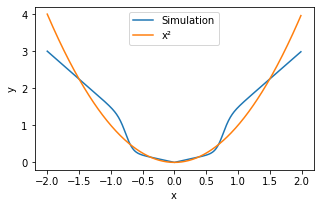

In [292]:
result_simulation = []

for i in x:
    system_first_order.set_variable("A", i)
    result_simulation.append(system_first_order.Sugeno_inference()["B"])

plot_surface_chart(result_simulation)

###### Mean squared error (MSE)

In [293]:
mse = mean_squared_error(y, result_simulation)
print('MSE: ', mse)

MSE:  0.12092432502737951


### 3.2. Classificação de Padrões

A figura abaixo apresenta um conjunto de dados de 5 classes diferentes. Os padrões de cada classe seguem um distribuição normal com desvio padrão de 0.2. As médias das classes são: classe 1 (0,0); classe 2 (-1,1); ); classe 3 (1,1); ); classe 4 (1,-1) e classe 5 (-1,-1).

In [294]:
def generate_class(mean_x, mean_y):
    standard_deviation = 0.2
    number_items = 100
    x = np.random.normal(mean_x, standard_deviation, number_items)
    y = np.random.normal(mean_y, standard_deviation, number_items)
    data = []
    for i in range(len(x)):
        data.append((x[i],y[i]))
    df = pd.DataFrame(data, columns=['x','y'])
    return df

df_class1 = generate_class(0, 0)
df_class2 = generate_class(-1, 1)
df_class3 = generate_class(1, 1)
df_class4 = generate_class(1, -1)
df_class5 = generate_class(-1, -1)

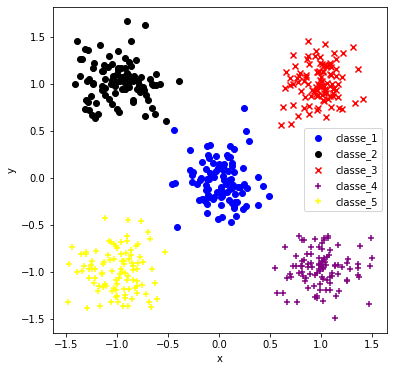

In [295]:
def plot_scatter(xi=None, yi=None):
    plt.figure(figsize=(6, 6))
    plt.scatter(df_class1['x'], df_class1['y'], marker='o', color='blue', label='classe_1')
    plt.scatter(df_class2['x'], df_class2['y'], marker='o', color='black', label='classe_2')
    plt.scatter(df_class3['x'], df_class3['y'], marker='x', color='red', label='classe_3')
    plt.scatter(df_class4['x'], df_class4['y'], marker='+', color='purple', label='classe_4')
    plt.scatter(df_class5['x'], df_class5['y'], marker='+', color='yellow', label='classe_5')
    if xi is not None and yi is not None:
        plt.scatter(xi, yi, color='green', marker='*', label='item em classificação', s=400)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plot_scatter()

Especifique e implemente um mecanismo de inferência para efetuar a classificação dos padrões apresentados na figura. Avalie o efeito dos operadores no formato da superfície de separação. Compare a superfície encontrada com teórica calculada usando teoria de probabilidade.

#### Antecedentes

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


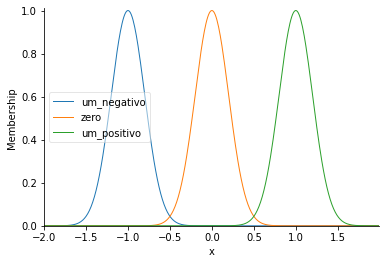

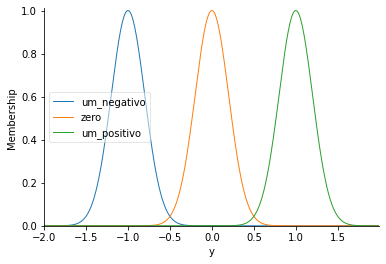

In [296]:
interval = 0.01

x = ctrl.Antecedent(np.arange(-2, 2, interval), 'x')
x['um_negativo'] = fuzz.gaussmf(x.universe, -1, 0.2)
x['zero'] = fuzz.gaussmf(x.universe, 0, 0.2)
x['um_positivo'] = fuzz.gaussmf(x.universe, 1, 0.2)
x.view()

y = ctrl.Antecedent(np.arange(-2, 2, interval), 'y')
y['um_negativo'] = fuzz.gaussmf(y.universe, -1, 0.2)
y['zero'] = fuzz.gaussmf(y.universe, 0, 0.2)
y['um_positivo'] = fuzz.gaussmf(y.universe, 1, 0.2)
y.view()

#### Consequentes

In [297]:
def get_consequent(defuzzify_method='centroid'):
    classe = ctrl.Consequent(np.arange(-1, 7, interval), 'classe', defuzzify_method=defuzzify_method)
    classe['classe_1'] = fuzz.gaussmf(classe.universe, 1, 0.04)
    classe['classe_2'] = fuzz.gaussmf(classe.universe, 2, 0.28)
    classe['classe_3'] = fuzz.gaussmf(classe.universe, 3, 0.28)
    classe['classe_4'] = fuzz.gaussmf(classe.universe, 4, 0.28)
    classe['classe_5'] = fuzz.gaussmf(classe.universe, 5, 0.28)
    return classe

### Regras e sistema fuzzy

In [312]:
def get_system(classe, and_func=np.fmin):
    rule1 = ctrl.Rule(x['zero'] & y['zero'], classe['classe_1'], and_func=and_func)
    rule2 = ctrl.Rule(x['um_negativo'] & y['um_positivo'], classe['classe_2'], and_func=and_func)
    rule3 = ctrl.Rule(x['um_positivo'] & y['um_positivo'], classe['classe_3'], and_func=and_func)
    rule4 = ctrl.Rule(x['um_positivo'] & y['um_negativo'], classe['classe_4'], and_func=and_func)
    rule5 = ctrl.Rule(x['um_negativo'] & y['um_negativo'], classe['classe_5'], and_func=and_func)
    system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
    return system

def print_membership(class_name, simulation, classe):
    membership = classe.terms[class_name].membership_value.__getitem__(simulation)
    print('Pertinência - ', class_name,': {:.7f}'.format(membership))

def simulate_classification(xi, yi, simulation, classe):
    simulation.input['x'] = xi
    simulation.input['y'] = yi
    simulation.compute()
    print_membership('classe_1', simulation, classe)
    print_membership('classe_2', simulation, classe)
    print_membership('classe_3', simulation, classe)
    print_membership('classe_4', simulation, classe)
    print_membership('classe_5', simulation, classe)
    classe.view(sim=simulation)
    plot_scatter(xi, yi)

### Sistema Mamadani com parâmetros padrões

In [299]:
classe = get_consequent()
system = get_system(classe)
simulation = ctrl.ControlSystemSimulation(system)

#### Simulação para x=0 e y=0

Pertinência -  classe_1 : 1.0000000
Pertinência -  classe_2 : 0.0000037
Pertinência -  classe_3 : 0.0000037
Pertinência -  classe_4 : 0.0000037
Pertinência -  classe_5 : 0.0000037


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


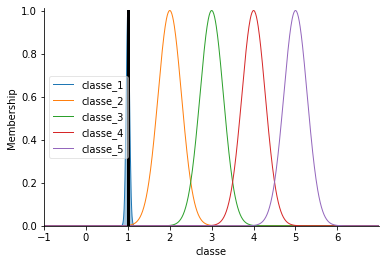

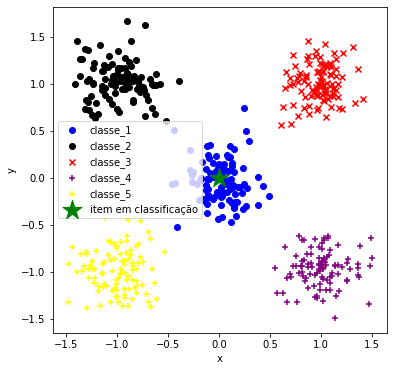

In [300]:
simulate_classification(0, 0, simulation, classe)


#### Simulação para x=0 e y=1

Pertinência -  classe_1 : 0.0000037
Pertinência -  classe_2 : 0.0000037
Pertinência -  classe_3 : 0.0000037
Pertinência -  classe_4 : 0.0000000
Pertinência -  classe_5 : 0.0000000


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


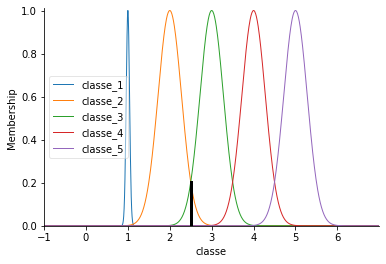

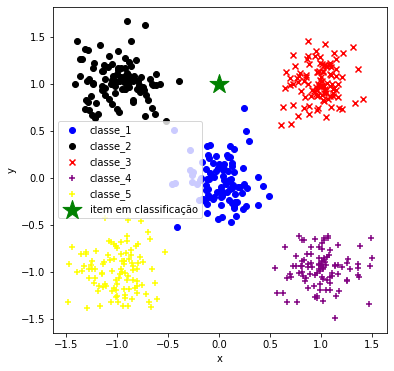

In [301]:
simulate_classification(0, 1, simulation, classe)

#### Simulação para x=0.4 e y=0.5

Pertinência -  classe_1 : 0.0439369
Pertinência -  classe_2 : 0.0000000
Pertinência -  classe_3 : 0.0111090
Pertinência -  classe_4 : 0.0000000
Pertinência -  classe_5 : 0.0000000


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


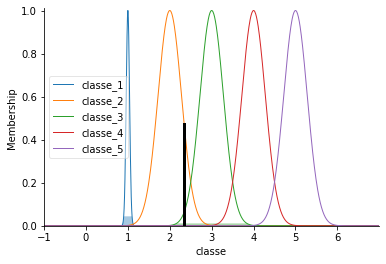

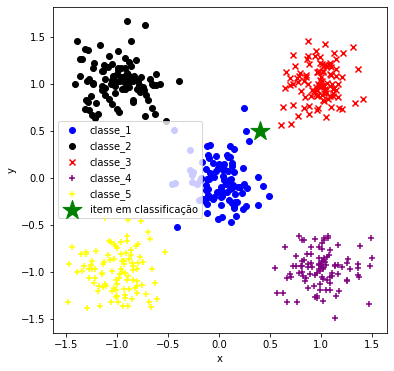

In [302]:
simulate_classification(0.4, 0.5, simulation, classe)

#### Simulação para x=0.4 e y=0.6

Pertinência -  classe_1 : 0.0111090
Pertinência -  classe_2 : 0.0000000
Pertinência -  classe_3 : 0.0111090
Pertinência -  classe_4 : 0.0000000
Pertinência -  classe_5 : 0.0000000


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


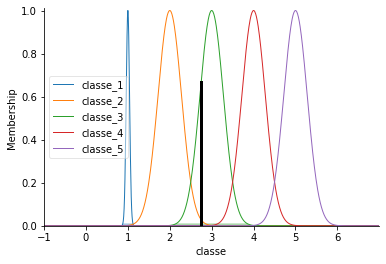

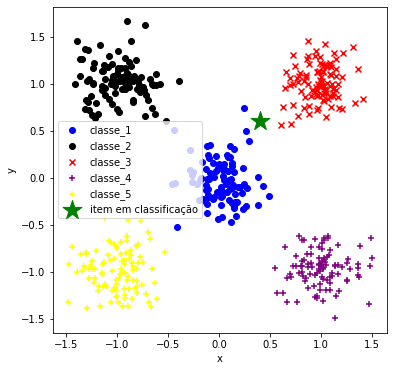

In [303]:
simulate_classification(0.4, 0.6, simulation, classe)

#### Simulação para x=0.4 e y=0.8

Pertinência -  classe_1 : 0.0003355
Pertinência -  classe_2 : 0.0000000
Pertinência -  classe_3 : 0.0111090
Pertinência -  classe_4 : 0.0000000
Pertinência -  classe_5 : 0.0000000


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


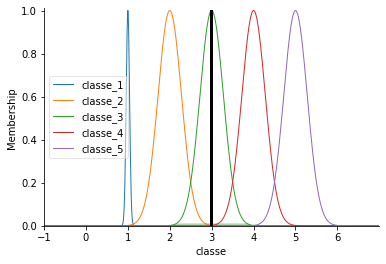

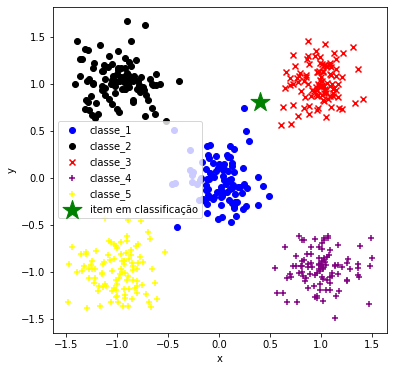

In [304]:
simulate_classification(0.4, 0.8, simulation, classe)

#### Gráfico de superfície


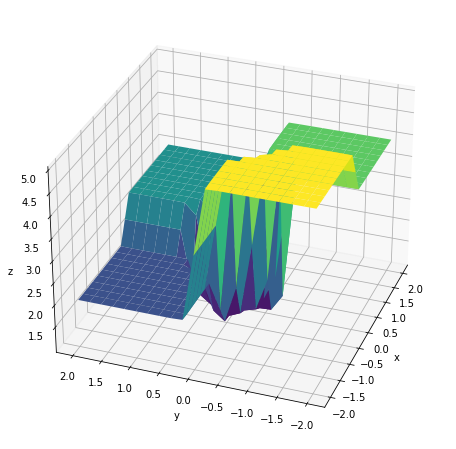

In [305]:
def prepare_data_3d(simulation):
    upsampled = np.linspace(-2, 2, 21)
    a, b = np.meshgrid(upsampled, upsampled)
    z = np.zeros_like(a)
    
    for i in range(21):
        for j in range(21):
            simulation.input['x'] = a[i, j]
            simulation.input['y'] = b[i, j]
            simulation.compute()
            z[i, j] = simulation.output['classe']
    return a, b, z


a, b, z = prepare_data_3d(simulation)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(a, b, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(30, 200)

#### Gráfico de contorno

No handles with labels found to put in legend.


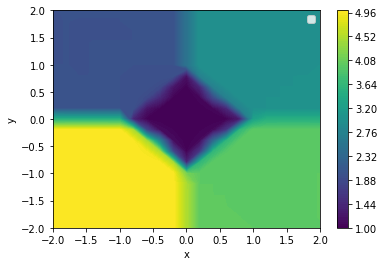

In [306]:
def plot_contour_chart(simulation):
    a, b, z = prepare_data_3d(simulation)
    plt.contourf(a, b, z, 100, cmap='viridis')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.colorbar();

plot_contour_chart(simulation)


### Sistema Mamadani com deffuzificação média de máximos

In [309]:
classe = get_consequent(defuzzify_method='mom')
system = get_system(classe)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


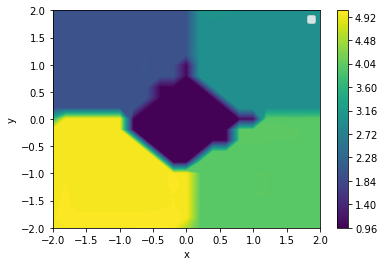

In [310]:
plot_contour_chart(simulation)


### Sistema Mamadani com operador and = produto

In [313]:
classe = get_consequent()
system = get_system(classe, and_func=np.multiply)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


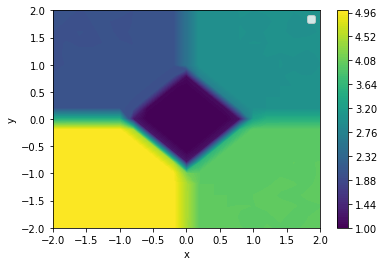

In [314]:
plot_contour_chart(simulation)


### Sistema Mamadani com operador and = produto e método de deffuzificação média de máximos

In [315]:
classe = get_consequent(defuzzify_method='mom')
system = get_system(classe, and_func=np.multiply)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


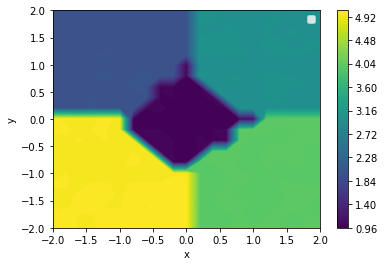

In [316]:
plot_contour_chart(simulation)


### Sistema Mamadani com operador and = produto e método de deffuzificação bisector

In [317]:
classe = get_consequent(defuzzify_method='bisector')
system = get_system(classe, and_func=np.multiply)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


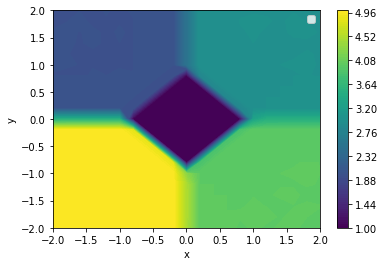

In [318]:
plot_contour_chart(simulation)


### Sistema Mamadani com operador and = produto e método de deffuzificação mínimo de máximos

In [319]:
classe = get_consequent(defuzzify_method='som')
system = get_system(classe, and_func=np.multiply)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


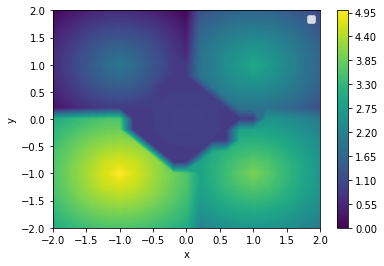

In [320]:
plot_contour_chart(simulation)


### Sistema Mamadani com operador and = produto e método de deffuzificação máximo de máximos

In [321]:
classe = get_consequent(defuzzify_method='lom')
system = get_system(classe, and_func=np.multiply)
simulation = ctrl.ControlSystemSimulation(system)

#### Gráfico de contorno

No handles with labels found to put in legend.


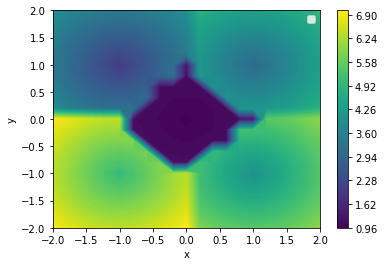

In [322]:
plot_contour_chart(simulation)


### Análise do efeito dos operadores no formato da superfície de separação

Nota-se que o operador 'and' sendo produto ao invés de mínimo apresenta melhor separação.

Em relação ao método de deffuzificação, os métodos centróide e bisector produziram melhor separação das classes que os métodos média de máximos, mínimo de máximos e máximo de máximos.